In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
##Import API key
from api_keys import weather_api_key

#Citipy will determine city based on latitude and longitude
from citipy import citipy

#Get cities from output file
output_data_file = "../output_data/cities.csv"

##Set Latitude and Longitude ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
##Set up URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

##Build query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
##List for holding latitudes/longitudes and cities
lat_lngs = []
cities = []


##get random lat and lng data
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

##Find the cities for each lat/lng
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)
        
    


In [5]:
##Create the dataframe
cities_df = pd.DataFrame({"City": cities})
cities_df["Lat"]=''
cities_df["Long"]=''
cities_df["Max Temp"]=''
cities_df["Humidity"]=''
cities_df["Cloudiness"]=''
cities_df["Wind Speed"]=''
cities_df["Country"]=''
cities_df["Date"]=''
cities_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,,,,,,,,
1,faya,,,,,,,,
2,palabuhanratu,,,,,,,,
3,atuona,,,,,,,,
4,vaini,,,,,,,,


In [6]:
##just a sample to see what the is returned from the request
# response = requests.get(query_url + 'frutal').json()
# response

In [7]:
##Stuff I tried in for loop
# temperature = []
# humidity = []
# cloudiness = []
# wind_speed = []
#         humidity.append(response['main']['humidity'])
#         cloudiness.append(response['clouds']['all'])
#         wind_speed.append(response['wind']['speed'])

In [14]:
##Loop through the cities to poplulate the dataframe

record_count = 0
set_count = 1
print("Beginning Data Retrieval")
print("------------------------------")
for index, row in cities_df.iterrows():
    city = row['City']
    response = requests.get(query_url + city).json()
    
##Update record and set counts to display during processing
    record_count += 1
    if record_count == 51:
        set_count += 1
        record_count = 1
        
##Populate dataframe with the response returned   
    try:
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Long'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']

        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    except:
        i = cities_df[cities_df['City']==city].index
        print(f"City {city} not found. Skipping...")
        cities_df.drop(i, inplace=True)  ###Remove the row from the dataframe
        pass

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | faya
City palabuhanratu not found. Skipping...
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | vaini
City illoqqortoormiut not found. Skipping...
Processing Record 7 of Set 1 | griffin
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | provideniya
City sentyabrskiy not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | te anau
Processing Record 13 of Set 1 | rocha
Processing Record 14 of Set 1 | sayyan
Processing Record 15 of Set 1 | mogadishu
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | pimentel
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | kasba
Processing Record 23 of Set 1 | punta arenas
Processing Reco

Processing Record 49 of Set 4 | canora
Processing Record 50 of Set 4 | cayambe
Processing Record 1 of Set 5 | chupa
Processing Record 2 of Set 5 | yerbogachen
Processing Record 3 of Set 5 | biak
Processing Record 4 of Set 5 | pemangkat
Processing Record 5 of Set 5 | trelew
Processing Record 6 of Set 5 | puerto escondido
Processing Record 7 of Set 5 | pangnirtung
Processing Record 8 of Set 5 | sao raimundo nonato
Processing Record 9 of Set 5 | lima
Processing Record 10 of Set 5 | mildura
Processing Record 11 of Set 5 | cozumel
Processing Record 12 of Set 5 | vestmannaeyjar
Processing Record 13 of Set 5 | touros
Processing Record 14 of Set 5 | nizhneangarsk
Processing Record 15 of Set 5 | santa ana
Processing Record 16 of Set 5 | milkovo
Processing Record 17 of Set 5 | belle fourche
Processing Record 18 of Set 5 | catazaja
Processing Record 19 of Set 5 | hofn
Processing Record 20 of Set 5 | boksitogorsk
Processing Record 21 of Set 5 | manturovo
Processing Record 22 of Set 5 | holoby
Proc

Processing Record 49 of Set 8 | okha
Processing Record 50 of Set 8 | price
Processing Record 1 of Set 9 | linxia
Processing Record 2 of Set 9 | riyadh
Processing Record 3 of Set 9 | moskovskiy
Processing Record 4 of Set 9 | zyrardow
Processing Record 5 of Set 9 | los llanos de aridane
Processing Record 6 of Set 9 | zhezkazgan
Processing Record 7 of Set 9 | narsaq
Processing Record 8 of Set 9 | warrington
City belushya guba not found. Skipping...
Processing Record 10 of Set 9 | artyom
Processing Record 11 of Set 9 | tandil
Processing Record 12 of Set 9 | barcelos
Processing Record 13 of Set 9 | fort nelson
Processing Record 14 of Set 9 | umea
Processing Record 15 of Set 9 | broome
Processing Record 16 of Set 9 | escarcega
Processing Record 17 of Set 9 | cabedelo
Processing Record 18 of Set 9 | ambanja
Processing Record 19 of Set 9 | damietta
Processing Record 20 of Set 9 | kodiak
Processing Record 21 of Set 9 | brighton
Processing Record 22 of Set 9 | glace bay
Processing Record 23 of S

Processing Record 48 of Set 12 | fomboni
Processing Record 49 of Set 12 | markala
Processing Record 50 of Set 12 | nishihara
Processing Record 1 of Set 13 | khasan
Processing Record 2 of Set 13 | necochea
City sinkat not found. Skipping...
Processing Record 4 of Set 13 | raudeberg
Processing Record 5 of Set 13 | gander


In [15]:
##Export weather data to a csv
cities_df.to_csv("output/citiesweatherdata.csv", index = False)
cities_df.head()


,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.18,-84.53,71.6,88,90,4.7,US,1597756678
1,faya,18.39,42.45,87.8,15,40,6.93,SA,1597756678
3,atuona,-9.8,-139.03,78.4,78,5,21.12,PF,1597756678
4,vaini,-21.2,-175.2,71.6,100,90,10.29,TO,1597756679
6,griffin,33.25,-84.26,73.4,94,1,5.82,US,1597756679


In [16]:
##Check for cities with humidity over 100%
cities_df.loc[cities_df['Humidity']>100]



,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


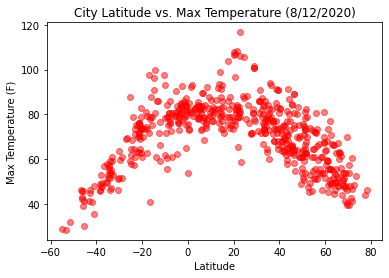

This plot shows how the maximum temperatures for given cities compares to the latitude of that       city.  The trend appears to be higher temperatures the closer the latitude is to zero (the equator)


In [46]:
##Temperature Scatterplot
plt.scatter(cities_df['Lat'], cities_df['Max Temp'], color = 'red', alpha = .5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (8/12/2020)")

plt.savefig("Output/maxtemp.png")
plt.show()

print("This plot shows how the maximum temperatures for given cities compares to the latitude of that \
      city.  The trend appears to be higher temperatures the closer the latitude is to zero (the equator)")

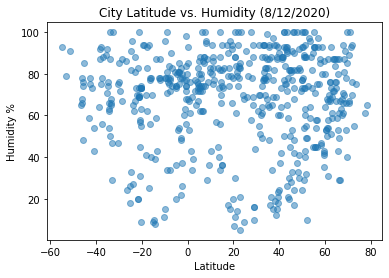

This plot shows the humidity for cities compared to latitude.  There is no discernable trend


In [47]:
##Humidity Scatterplot
plt.scatter(cities_df['Lat'], cities_df['Humidity'], alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs. Humidity (8/12/2020)")

plt.savefig("Output/humidity.png")
plt.show()

print("This plot shows the humidity for cities compared to latitude.  There is no discernable trend")

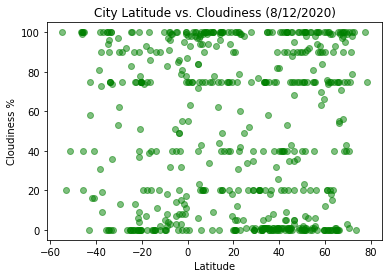

This plot shows the cloudiness for cities compared to latitude.  There is no discernable trend


In [48]:
##Cloudiness Scatterplot
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'], color = 'green', alpha = .5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude vs. Cloudiness (8/12/2020)")

plt.savefig("Output/cloudiness.png")
plt.show()

print("This plot shows the cloudiness for cities compared to latitude.  There is no discernable trend")

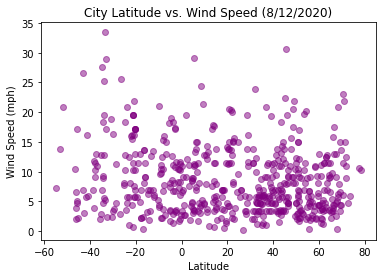

This plot shows the wind speed in MPH for cities compared to latitude.  There is no discernable trend


In [49]:
##Wind Speed Scatterplot
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'],color='purple',alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed (8/12/2020)")

plt.savefig("Output/wind_speed.png")
plt.show()

print("This plot shows the wind speed in MPH for cities compared to latitude.  There is no discernable trend")

In [50]:
##Set up DataFrame for Northern and Southern hemispheres
cities_df['Lat'] = cities_df['Lat'].astype(float)
cities_df["Max Temp"] = cities_df["Max Temp"].astype(float)
cities_df["Humidity"] = cities_df["Humidity"].astype(float)
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype(float)
cities_df["Wind Speed"] = cities_df["Wind Speed"].astype(float)

southern = cities_df.loc[cities_df["Lat"] < 0]
northern = cities_df.loc[cities_df["Lat"] > 0]

northern.to_csv("output/northern_hemisphere.csv", index = False)
southern.to_csv("output/southern_hemisphere.csv", index = False)

northern.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.18,-84.53,71.60,88.0,90.0,4.70,US,1597756678
1,faya,18.39,42.45,87.80,15.0,40.0,6.93,SA,1597756678
6,griffin,33.25,-84.26,73.40,94.0,1.0,5.82,US,1597756679
7,thompson,55.74,-97.86,55.40,93.0,75.0,4.70,CA,1597756680
8,provideniya,64.38,-173.3,49.19,76.0,93.0,8.97,RU,1597756680


In [51]:
##The function to calculate regression information

def calc_regression():
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    ##Plot northern hemisphere
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")

    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"{title_display} vs. Latitude")
    

    

The r-squared is: 0.6909992480565603


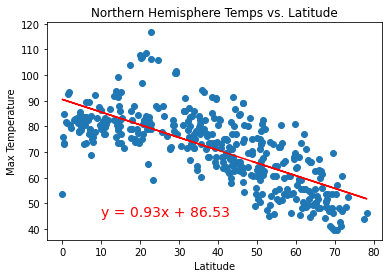

This regression model shows the maximum temperatures for cities in the Northern Hemisphere.  The trend is as it gets further from the equator (latitude = 0) the temperature decreases


In [53]:
##Northern Hemisphere Linear Regression for temperature
x_values = northern["Lat"]
y_values = northern["Max Temp"]

##Fill in values for labels
ylabel = "Max Temperature"
title_display = "Northern Hemisphere Temps"

##Call the regression function
calc_regression()

#Plot the returned line equation
plt.annotate(line_eq, (10,45), color = 'red', fontsize=14)

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/north_maxtemp.png")
plt.show()


print("This regression model shows the maximum temperatures for cities in the Northern Hemisphere.  \
The trend is as it gets further from the equator (latitude = 0) the temperature decreases")

The r-squared is: 0.6909992480565603


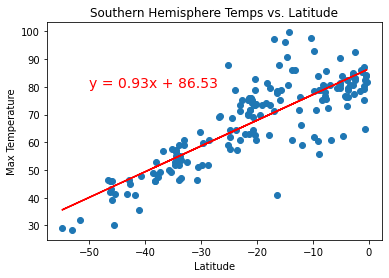

This regression model shows the maximum temperatures for cities in the Southern Hemisphere.  The trend is as it gets closer to the equator (latitude = 0) the temperature increases


In [54]:
##Southern Hemisphere Linear Regression for temperature
x_values = southern["Lat"]
y_values = southern["Max Temp"]

##Fill in values for labels
ylabel = "Max Temperature"
title_display = "Southern Hemisphere Temps"

##Call the regression function
calc_regression()


#Plot the returned line equation
plt.annotate(line_eq, (-50,80), color = 'red', fontsize=14)

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/south_maxtemp.png")
plt.show()

print("This regression model shows the maximum temperatures for cities in the Southern Hemisphere.  \
The trend is as it gets closer to the equator (latitude = 0) the temperature increases")

The r-squared is: 0.6909992480565603


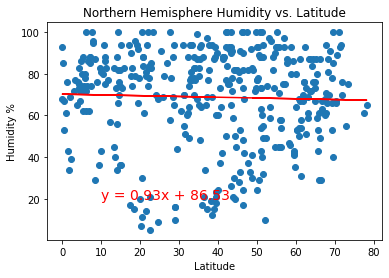

This regression model shows the humidity percentages for cities in the Northern Hemisphere.  There is only a very slight trend of lower humidity as it gets further from the equator


In [55]:
##Northern Hemisphere Linear Regression for Humidity
x_values = northern["Lat"]
y_values = northern["Humidity"]

##Fill in values for labels
ylabel = "Humidity %"
title_display = "Northern Hemisphere Humidity"

##Call the regression function
calc_regression()


plt.annotate(line_eq, (10,20), color = 'red', fontsize=14)

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/north_humidity.png")
plt.show()

print("This regression model shows the humidity percentages for cities in the Northern Hemisphere.  \
There is only a very slight trend of lower humidity as it gets further from the equator")

The r-squared is: 0.6909992480565603


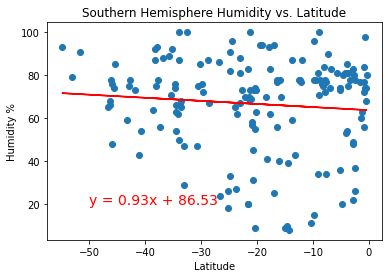

This regression model shows the humidity percentages for cities in the Southern Hemisphere.  There is a slight trend of lower humidity as it approaches the equator


In [58]:
##Southern Hemisphere Linear Regression for humidity
x_values = southern["Lat"]
y_values = southern["Humidity"]

##Fill in values for labels
ylabel = "Humidity %"
title_display = "Southern Hemisphere Humidity"

##Call the regression function
calc_regression()

plt.annotate(line_eq, (-50,20), color = 'red', fontsize=14)

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/south_humidity.png")
plt.show()

print("This regression model shows the humidity percentages for cities in the Southern Hemisphere.  \
There is a slight trend of lower humidity as it approaches the equator")

The r-squared is: 0.6909992480565603


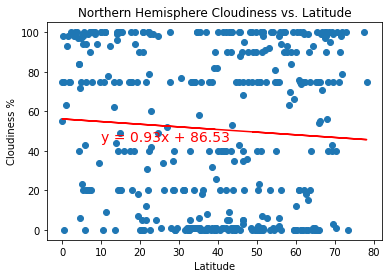

This regression model shows the cloudiness percentages for cities in the Northern Hemisphere. There is a slight trend of lower cloudiness as it gets further from the equator


In [60]:
##Northern Hemisphere Linear Regression for cloudiness
x_values = northern["Lat"]
y_values = northern["Cloudiness"]

##Fill in values for labels
ylabel = "Cloudiness %"
title_display = "Northern Hemisphere Cloudiness"

##Call the regression function
calc_regression()


plt.annotate(line_eq, (10,45), color = 'red', fontsize=14)

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/north_cloudiness.png")
plt.show()

print("This regression model shows the cloudiness percentages for cities in the Northern Hemisphere. \
There is a slight trend of lower cloudiness as it gets further from the equator")

The r-squared is: 0.6909992480565603


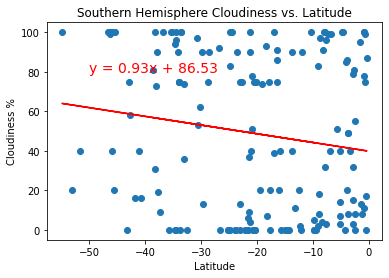

This regression model shows the cloudiness percentages for cities in the Southern Hemisphere. The trend is lower cloudiness as it appoaches the equator.


In [61]:
##Southern Hemisphere Linear Regression for cloudiness
x_values = southern["Lat"]
y_values = southern["Cloudiness"]

##Fill in values for labels
ylabel = "Cloudiness %"
title_display = "Southern Hemisphere Cloudiness"

##Call the regression function
calc_regression()


plt.annotate(line_eq, (-50,80), color = 'red', fontsize=14)

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/south_cloudiness.png")
plt.show()

print("This regression model shows the cloudiness percentages for cities in the Southern Hemisphere. \
The trend is lower cloudiness as it appoaches the equator.")

The r-squared is: 0.6909992480565603


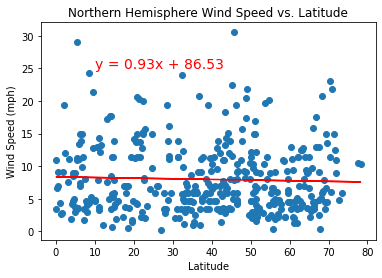

This regression model shows the wind speed in miles per hour for cities in the Northern Hemisphere.  There is only a slight trend of lower wind speeds further from the equator


In [62]:
##Northern Hemisphere Linear Regression for Wind Speed
x_values = northern["Lat"]
y_values = northern["Wind Speed"]

##Fill in values for labels
ylabel = "Wind Speed (mph)"
title_display = "Northern Hemisphere Wind Speed"

##Call the regression function
calc_regression()


plt.annotate(line_eq, (10,25), color = 'red', fontsize=14)

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/north_windspeed.png")
plt.show()

print("This regression model shows the wind speed in miles per hour for cities in the Northern Hemisphere.  \
There is only a slight trend of lower wind speeds further from the equator")

The r-squared is: 0.6909992480565603


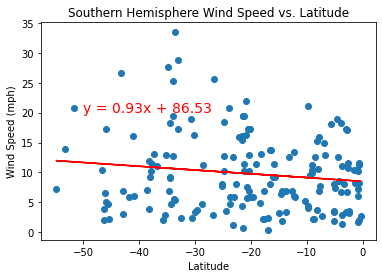

This regression model shows the wind speed in miles per hour for cities in the Southern Hemisphere. There is a slight trend of lower wind speeds as it approaches the equator


In [64]:
##Southern Hemisphere Linear Regression Wind Speed
x_values = southern["Lat"]
y_values = southern["Wind Speed"]

##Fill in values for labels
ylabel = "Wind Speed (mph)"
title_display = "Southern Hemisphere Wind Speed"

##Call the regression function
calc_regression()


plt.annotate(line_eq, (-50,20), color = 'red', fontsize=14)

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/south_windspeed.png")
plt.show()

print("This regression model shows the wind speed in miles per hour for cities in the Southern Hemisphere. \
There is a slight trend of lower wind speeds as it approaches the equator")